In [1]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is A233-E5E9

 Directory of d:\Bharat Intern\SMS Classifier

23-06-2024  23:27    <DIR>          .
23-06-2024  19:18    <DIR>          ..
23-06-2024  19:20    <DIR>          .ipynb_checkpoints
29-06-2024  22:44         1,073,317 sms classifier.ipynb
23-06-2024  19:22           503,663 spam.csv
               2 File(s)      1,576,980 bytes
               3 Dir(s)  81,489,354,752 bytes free


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
encodings = ['utf-8','latin1','ISO-8859-1','cp1252']

In [4]:
file_path = 'spam.csv'

In [5]:
for encoding in encodings:
    try:
        df = pd.read_csv(file_path,encoding = encoding)
        print("File Successfully read with -:",encoding)
        break
    except UnicodeDecodeError:
        print("Failed To read with encoding: ",encoding)
        continue

if 'df' in locals():
    print("CSV file loaded successfully")
else:
    print("All encoding attempts, Failed")

Failed To read with encoding:  utf-8
File Successfully read with -: latin1
CSV file loaded successfully


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5412,ham,Gr8. So how do you handle the victoria island ...,NaN,NaN,NaN
1316,ham,Why nothing. Ok anyway give me treat,NaN,NaN,NaN
1035,ham,"Hello baby, did you get back to your mom's ? A...",NaN,NaN,NaN
1852,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
2102,ham,Audrie lousy autocorrect,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.shape

(5572, 5)

### 1. Data Cleaning

In [10]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# renaming the cols
df.rename(columns={'v1':'remark', 'v2':'text'},inplace=True)

In [14]:
df.head()

,remark,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['remark'] = encoder.fit_transform(df['remark'])

In [17]:
df.head()

,remark,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
#missing values
df.isnull().sum()

remark    0
text      0
dtype: int64

In [19]:
# no. of duplicated values
df.duplicated().sum()

403

In [20]:
df = df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

## Exploratry Data Analysis

In [23]:
df['remark'].value_counts()

remark
0    4516
1     653
Name: count, dtype: int64

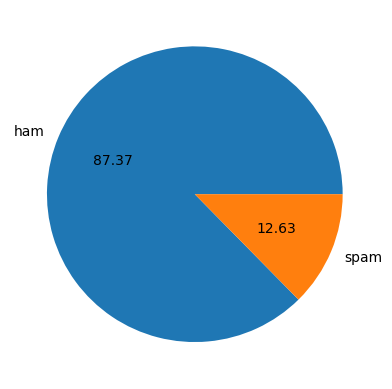

In [24]:
plt.pie(df['remark'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pankr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len) #getting number of character in a sentence

In [28]:
# getting number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,remark,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,remark,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df.iloc[:,2:].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#remark = ham
df[df['remark']==0].iloc[:,2:].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['remark']==1].iloc[:,2:].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Data Visualization

In [35]:
import seaborn as sns

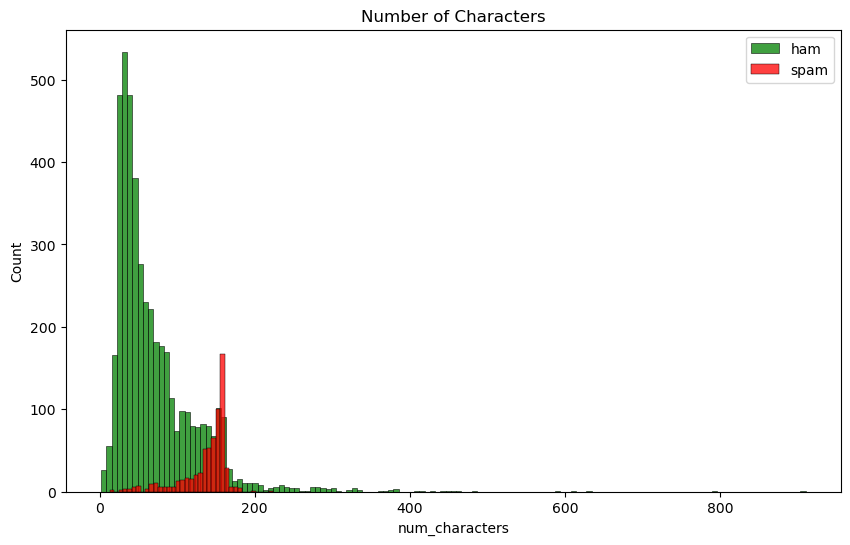

In [36]:
plt.figure(figsize=(10,6))
plt.title("Number of Characters")
sns.histplot(df[df["remark"]==0]['num_characters'],color='green')
sns.histplot(df[df['remark']==1]['num_characters'],color='red')
plt.legend(['ham','spam'])
plt.show()

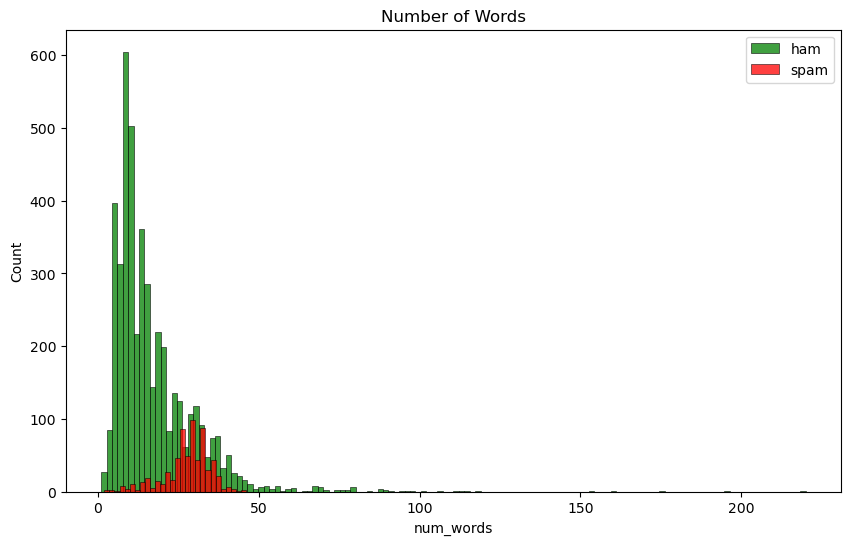

In [37]:
plt.figure(figsize=(10,6))
plt.title("Number of Words")
sns.histplot(df[df["remark"]==0]['num_words'],color='green')
sns.histplot(df[df['remark']==1]['num_words'],color='red')
plt.legend(['ham','spam'])
plt.show()

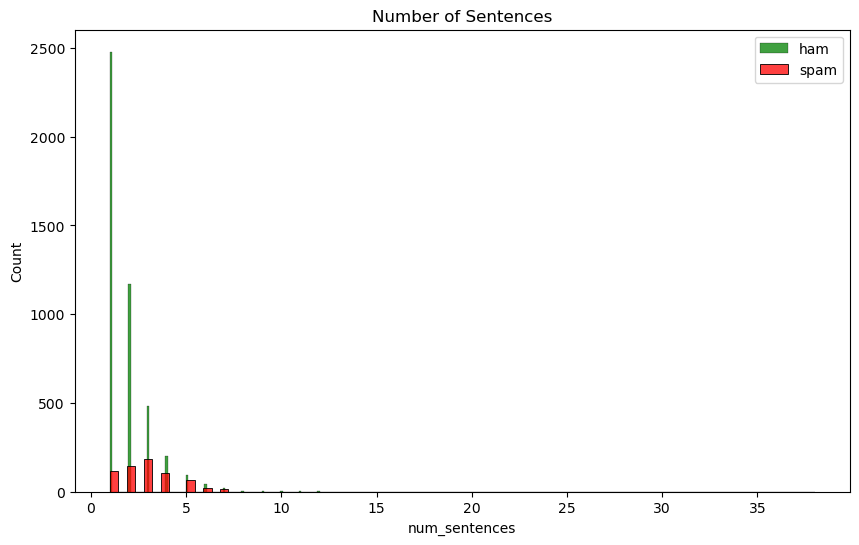

In [38]:
plt.figure(figsize=(10,6))
plt.title("Number of Sentences")
sns.histplot(df[df["remark"]==0]['num_sentences'],color='green')
sns.histplot(df[df['remark']==1]['num_sentences'],color='red')
plt.legend(['ham','spam'])
plt.show()

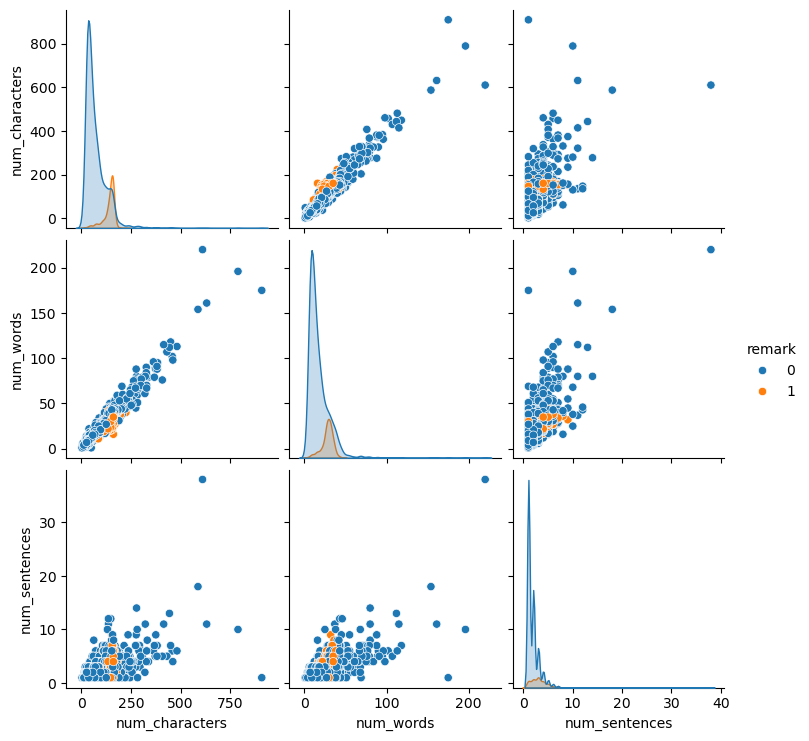

In [39]:
sns.pairplot(df,hue='remark')

<Axes: >

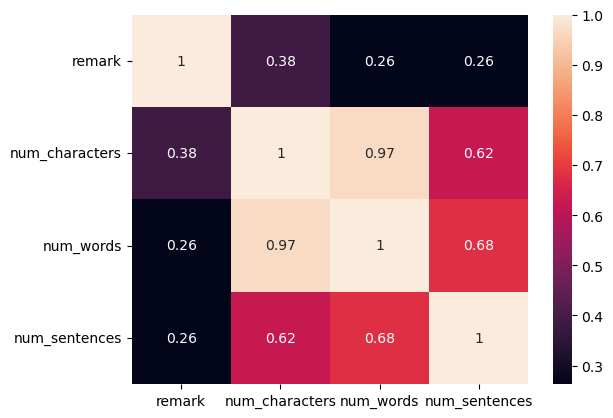

In [40]:
sns.heatmap(data=df[['remark','num_characters','num_words','num_sentences']].corr(),annot=True)

### Data Pre-processing
- Removing Stopwords, punctuations
- making all char to lowercase, tokenize them and performing stemming to reduce complexity

In [41]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pankr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
ps = PorterStemmer()

In [43]:
def Preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [44]:
text = "She went there as her mom told her to bring vegetables from the market."

In [45]:
ppt = Preprocess_text(text)

In [46]:
print(ppt)

went mom told bring veget market


In [47]:
sample = Preprocess_text(df['text'][10])
print(sample)

gon na home soon want talk stuff anymor tonight k cri enough today


In [48]:
#demo potter stemmer
ps.stem("walking")

'walk'

In [49]:
df['preprocess_text'] = df['text'].apply(Preprocess_text)

In [50]:
df.head()

,remark,text,num_characters,num_words,num_sentences,preprocess_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')

In [52]:
spam_wc = wc.generate(df[df['remark']==1]['preprocess_text'].str.cat(sep=" "))

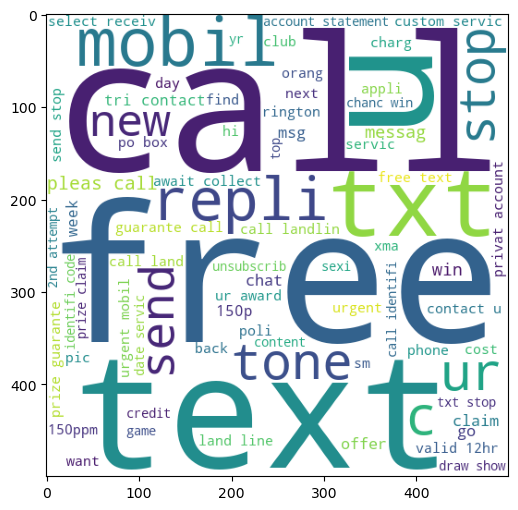

In [53]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

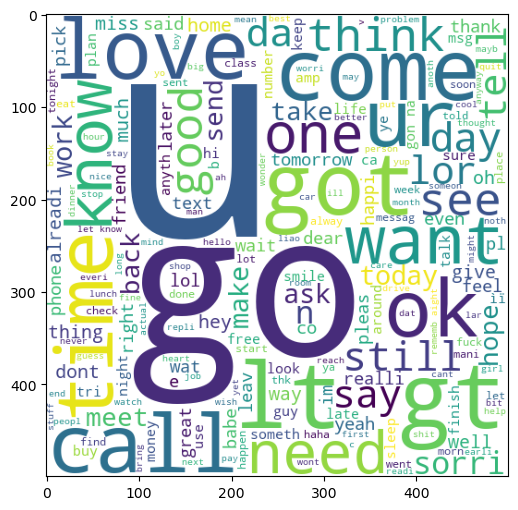

In [54]:
ham_wc = wc.generate(df[df['remark']==0]['preprocess_text'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

In [55]:
spam_corpus = []
for char in df[df['remark']==1]['preprocess_text'].tolist():
    for word in char.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

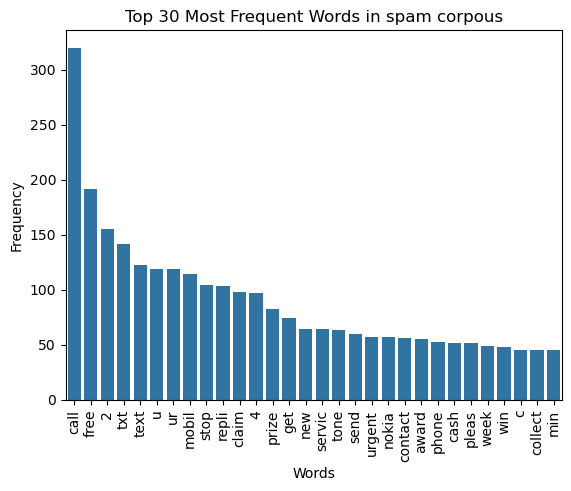

In [57]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Frequent Words in spam corpous")
plt.xticks(rotation="vertical")
plt.show()

In [58]:
ham_corpus = []
for char in df[df['remark']==0]['preprocess_text'].tolist():
    for word in char.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35404

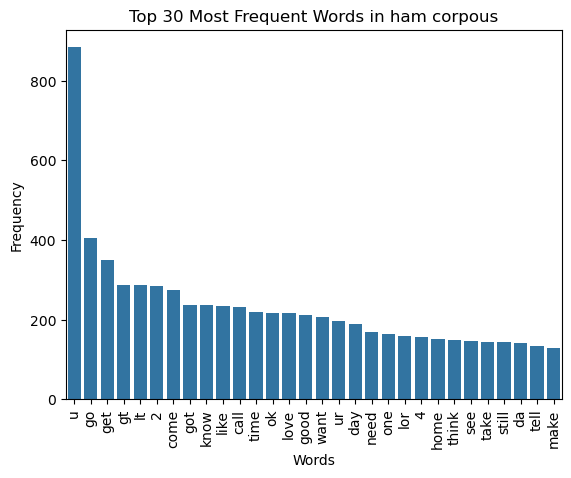

In [60]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Frequent Words in ham corpous")
plt.xticks(rotation="vertical")
plt.show()

### Model Building and Testing various Algorithms
- 

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [62]:
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [63]:
X = tf.fit_transform(df['preprocess_text']).toarray()

In [64]:
X.shape

(5169, 3000)

In [65]:
y = df['remark'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score   

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
# GaussianNB
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_gnb))
print("Precision Score :",precision_score(y_test,y_pred_gnb))

Accuracy Score : 0.8694390715667312
Confusion Matrix:
[[788 108]
 [ 27 111]]
Precision Score : 0.5068493150684932


In [70]:
#MultinomialNB
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_mnb))
print("Precision Score :",precision_score(y_test,y_pred_mnb))


Accuracy Score : 0.9709864603481625
Confusion Matrix:
[[896   0]
 [ 30 108]]
Precision Score : 1.0


In [71]:
#BernoulliNB
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_bnb))
print("Precision Score :",precision_score(y_test,y_pred_bnb))

Accuracy Score : 0.9835589941972921
Confusion Matrix:
[[895   1]
 [ 16 122]]
Precision Score : 0.991869918699187


### Experimenting All Models as Possible

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [74]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AB':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XgB':xgb
}

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    c_acc,c_pre = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(c_acc)
    precision_scores.append(c_pre)
    print("Model ->", name)
    print(name,"Accuracy :",c_acc)
    print(name," precision :",c_pre)


Model -> SVC
SVC Accuracy : 0.9758220502901354
SVC  precision : 0.9747899159663865
Model -> KN
KN Accuracy : 0.9052224371373307
KN  precision : 1.0
Model -> NB
NB Accuracy : 0.9709864603481625
NB  precision : 1.0
Model -> DT
DT Accuracy : 0.9323017408123792
DT  precision : 0.8333333333333334
Model -> LR
LR Accuracy : 0.9584139264990329
LR  precision : 0.9702970297029703
Model -> RF
RF Accuracy : 0.9758220502901354
RF  precision : 0.9829059829059829


c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model -> AB
AB Accuracy : 0.960348162475822
AB  precision : 0.9292035398230089
Model -> BgC
BgC Accuracy : 0.9584139264990329
BgC  precision : 0.8682170542635659
Model -> ETC
ETC Accuracy : 0.9748549323017408
ETC  precision : 0.9745762711864406
Model -> GBDT
GBDT Accuracy : 0.9468085106382979
GBDT  precision : 0.9191919191919192
Model -> XgB
XgB Accuracy : 0.9671179883945842
XgB  precision : 0.9262295081967213


In [77]:
performace_df = pd.DataFrame({'Algorithm':clfs.keys(),
                             'Accuracy':accuracy_scores,
                             'Precision':precision_scores})

In [78]:
performace_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.932302,0.833333
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AB,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [79]:
temp = pd.melt(performace_df,id_vars='Algorithm')

In [80]:
temp

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.932302
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.975822
6,AB,Accuracy,0.960348
7,BgC,Accuracy,0.958414
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.946809


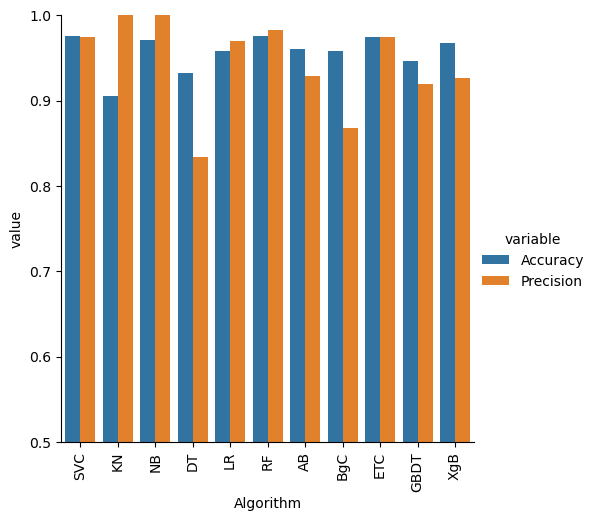

In [81]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=temp,kind='bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
temp_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [83]:
new_df = performace_df.merge(temp_df2,on='Algorithm')

In [84]:
new_df_scaled = new_df.merge(temp_df2,on='Algorithm')

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_chars':accuracy_scores,'Precision_max_chars':precision_scores})

In [86]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_max_chars,Precision_max_chars
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,DT,0.932302,0.833333,0.932302,0.833333,0.932302,0.833333,0.932302,0.833333
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
6,AB,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
8,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192


In [87]:
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [88]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)], voting='soft')

In [89]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [90]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [91]:
#applying stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [92]:
from sklearn.ensemble import StackingClassifier

In [93]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [94]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))

Accuracy : 0.9796905222437138
Precision : 0.9465648854961832
